<a href="https://colab.research.google.com/github/nicabey/Numerical-Methods/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Module 5

Numerical Methods 

Dr. Jacob

Laxman Bista, Nichole Beyer, Ritu Mahajan, Sanjay Katuwal


We are using the Gauss-Jordan algorithm from Project Part 4. Then we will apply the direct interpolation method to creat a polynomial going through at lease five unique points on our function from project 1.

In [ ]:
import math
import numpy as np
import scipy.linalg as la

def addRows(matrix,targetRow, modifierRow, value):
  newRow = matrix[targetRow,:]+value*matrix[modifierRow,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != targetRow:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)


def changeToLeadingOne(matrix,row,column):
  newMatrix =[]
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)


def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = changeToLeadingOne(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

# Direct Method of Interpolation

We are using polynomial to solve the direct method of Interpolation. Polynomials are the most common choice of interpolants because they are easy to evaluate, integrate and differentiate.
For Direct method,
Given, 'n+1' data points $(x_0,y_0), (x_1,y_1), ...... (x_n,y_n)$, pass a polynomial of order 'n' through the data as given below:
y = $$a_0 + a_1x + ....... + a_nx^n  ----- (eq^i)$$
where $a_0,a_1,.....a_n$ are real constants.
- Set up 'n+1' equations to find 'n+1' constants
- To Find the value 'y' at a given value of 'x',
simply sibstutite the value of 'x' in the above polynomial
<br>
<br> 
let's suppose we are given with the 5 unique points $(x_0,y_0),(x_1,y_1),(x_2,y_2),(x_3,y_3),(x_4,y_4) $,  $(eq^i)$ becomes, <br>
$$
a_0+a_1x_0+a_2 x_0^2+\cdots +a_n x_0^n = y_0 
$$
<br>
$$
a_0+a_1x_1+a_2 x_1^2+\cdots +a_n x_1^n = y_1 
$$
<br>
$$
a_0+a_1x_2+a_2 x_2^2+\cdots +a_n x_2^n = y_2
$$
<br>
$$
a_0+a_1x_3+a_2 x_3^2+\cdots +a_n x_3^n = y_3
$$
<br>
$$
a_0+a_1x_4+a_2 x_4^2+\cdots +a_n x_4^n = y_4
$$ where $y_0 = f(x)$
<br>
Now, lets set them into a matrix from, we have 5 unknowns which are $$a_0,a_1,a_2,a_3,a_4$$


$$
\left[
\begin{array}{ccccc|c}
1&x_0&x_0^2&\cdots&x_0^n&y_0\\
\vdots&&\ddots&&\vdots\\
1&x_{n-1}&x_{n-1}^2&\dots& x_{n-1}^n&y_{n-1}
\end{array}
\right]
$$




The way we are going to use the Gauss method is 
- first implementing the unique point
- find constants
- put values of unique points and constants to create a polynomial

Creating singled row matrix/array using input, constantOutput, and the orderOfPolynomial.
where we append the square of input, and we will be using n+1 ordered polynomial.

In [ ]:
def createRow(input,constantOutput,orderOfPolynomial):
  singleRowArray = []
  for i in range(orderOfPolynomial+1):
    singleRowArray.append(input**i)
  singleRowArray.append(constantOutput)
  return singleRowArray

In [ ]:
createRow(3,5,6)

[1, 3, 9, 27, 81, 243, 729, 5]

I am going to choose points (1,2), (3,4), (5,6), and (7,2)

In [ ]:
points = [[1,2],[3,4],[5,6],[7,2]]

# Creating an Augmented Matrix

Now we are going to make a augmneted array matrix with the help of above createRow method. 

In [ ]:
def createAugmentedMatrix(dataAsArray):
  matrix = []
  order = len(dataAsArray)-1
  for i in range(len(dataAsArray)):
    matrix.append(createRow(dataAsArray[i][0],dataAsArray[i][1],order))
  return np.array(matrix)



let's talk about the above method. We can see the length required matrix is 4*5. Here we will take dataArray[i][0] manages the row and dataArrat[i][1] is the last column which was the output in the createRow function. 
<br>
Now lets call the above function with the points we specified

In [ ]:
createAugmentedMatrix(points)

array([[  1,   1,   1,   1,   2],
       [  1,   3,   9,  27,   4],
       [  1,   5,  25, 125,   6],
       [  1,   7,  49, 343,   2]])

Now, lets use **Gauss Jordan method** with createAugmentMatrix as a parameter. We will also be using String interpolation which means you can use string inside a string data-type.
<br>
**USAGES:**
<br>
- Title in graph
- Show error messages
- Pass a statement to a function


In [ ]:
gaussJordan(createAugmentedMatrix(points))[:,-1]

string = ''
for i in range(len(gaussJordan(createAugmentedMatrix(points))[:,-1])):
  coef = gaussJordan(createAugmentedMatrix(points))[i,-1]
  string = string + " " + '{}'.format(coef) +  r'x^{}'.format(i)

string


' 2.875x^0 -1.875x^1 1.125x^2 -0.125x^3'

# Direct Spline

In the mathematical field of Numerical Analysis, spline interpolation is a form of interpolation where the interpolant is a special type of piecewise polynomial called spline. Here we have dataasArray from createAugmentMatrix and a variable to create a Spline function.
Here, lets make ourselves two points on different axis:
<br>
x_points = [ 0, 1, 2, 3, 4, 5]<br>
y_points = [6,7,8,9,10,11]

Here, we will be using a scipy library to make do some scientific computing. Here we will use the value of variable as an input to the function

In [ ]:
from scipy import interpolate

def lSpline(variable):
    x_axis = [ 0, 1, 2, 3, 4, 5]
    y_axis = [12,14,22,39,58,77]

    tick = interpolate.splrep(x_axis, y_axis)
    return interpolate.splev(variable, tick)



In [ ]:
print(lSpline(2))

22.000000000000007


Let's make a use of matplotlib library to graph

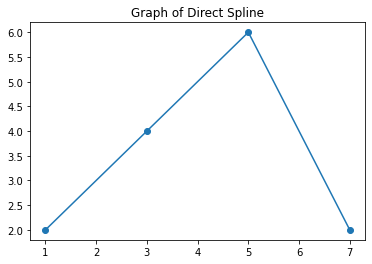

In [ ]:
import matplotlib.pyplot as plt
x = np.arange( 0,10)
firstpoint = np.array(points)[:,0]
secondpoint = np.array(points)[:,1]
plt.scatter(firstpoint,secondpoint)
plt.plot(firstpoint,secondpoint)
plt.title('Graph of Direct Spline')
plt.show()

# Linear Spline

Linear Spline represents a set of line segments between two adjacent points. 
<br>
In order to work with Linear Spline,we need to make sure we have our data in sorted manner.
<br>
Here we have a parameter "input" whose value we need to find using the upper and lower bound of the data given.
Then the equation becomes:
$v_1(t) $<br>$ = v(lowerbound)- v(upperbound)-v(lowerbound)}*(input-lowerbound)/(upperbound-lowerbound)
$

# Example of Linear Spline:
Let's suppose we are working with time and velocity of rocket as we have seen this kind of examples in Physics. Suppose we are given with time and velocity in sorted order(if not sorted, we need to sort it first)
Steps to find Linear Spline
- Use the above given formula and put the data in it. If you are given time like 10,11,15, 17, 18 with t = 16 as your time or input. In this case you will choose the nearest 2 numbers from 16 which are 17, 18. 
- lowerbound: 17, upperbound: 18
- at last using the given input that is 16, you will find the velocity of the rocket.

Below are a few interpolations of the function f(x)= e^x, following these will be the linear splines 

##Linear Splines 
Lets try doing this with a basic function $f(x) = \ e^ x$ on the interval $[0,10]$

First with 5 points 


In [ ]:
def even_div(function,lower,upper,numberOfDivisions):
  ChangeInx = (upper - lower)/(numberOfDivisions - 1)
  array = []
  for i in range(numberOfDivisions):
    array.append([lower + i*ChangeInx,function(lower + i*ChangeInx)])
  return np.array(array)

fivepoints = even_div(np.exp,0,10,5)

In [ ]:
def slope(pointInitial,pointFinal):
  return (pointFinal[1]-pointInitial[1])/(pointFinal[0]-pointInitial[0])

In [ ]:
def linerSpline(array,input):
  x = array[:,0]
  y = array[:,1]
  for i in range(len(x)-1):
    if (x[i]< input) & (input < x[i+1]):
      return y[i]+ slope(array[i,:],array[i+1,:])*(input - x[i])
    else:
      continue

In [ ]:
linerSpline(fivepoints,1)

5.472997584281389

In [ ]:
x = np.arange(0,10,0.1)
y = [linerSpline(fivepoints,x) for x in x]

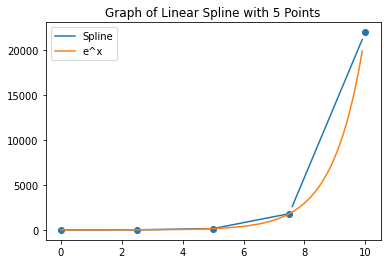

In [ ]:
x = np.arange(0,10,0.1)

plt.scatter(fivepoints[:,0],fivepoints[:,1])
plt.plot(x,y)
plt.plot(x, np.exp(x))
plt.title('Graph of Linear Spline with 5 Points')
plt.legend(['Spline','e^x'])


plt.show()

Now with 20 points for the same function

In [ ]:
twenty = even_div(np.exp,0,10,20)

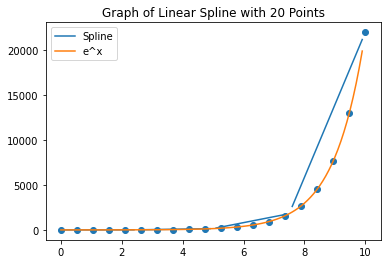

In [ ]:
plt.scatter(twenty[:,0],twenty[:,1])
plt.plot(x,y)
plt.plot(x, np.exp(x))
plt.title('Graph of Linear Spline with 20 Points')
plt.legend(['Spline','e^x'])


plt.show()

It doesnt look like the spline fits the graph the way we would hope. When using more and more points we would expect the graphs to almost line up exactly, but alas we do not see that here. We do see that 20 is better than 5 but not as good as it could be. 